In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 34kB/s 
     |████████████████████████████████| 3.8MB 46.4MB/s 
     |████████████████████████████████| 512kB 48.7MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=b0a14fdddaa084017558b222e1de53f275f2f531659d6bd73cb6c14c12ca4255
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [ ]:
pip install dopamine-rl==3.0.1

     |████████████████████████████████| 92kB 5.8MB/s 
  Found existing installation: dopamine-rl 1.0.5
    Uninstalling dopamine-rl-1.0.5:
      Successfully uninstalled dopamine-rl-1.0.5


In [ ]:
!pip install gym-retro

     |████████████████████████████████| 162.0MB 91kB/s 


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
import numpy as np
import os
import retro
import sys
sys.path.append('/content/drive/Shared drives/COML-STUDENTS-2020/Fall/Team Projects/T9 Game Playing/Gym_retro')
import Gym_retro

#DQN for baselines
from dopamine.agents.dqn import dqn_agent
from dopamine.discrete_domains import run_experiment
from dopamine.discrete_domains.gym_lib import create_gym_environment
from dopamine.colab import utils as colab_utils
from dopamine.discrete_domains import atari_lib

import gin.tf

#warnings
from absl import flags

In [ ]:
!python -m retro.import

Importing StreetFighterIISpecialChampionEdition-Genesis
Imported 1 games


In [ ]:
#where to store training logs
BASE_PATH = "/content"
print(BASE_PATH)
#which arcade environment?
GAME = 'StreetFighterIISpecialChampionEdition-Genesis'  # @param

/content


In [ ]:
import tensorflow as tf
gin.enter_interactive_mode()
class Game:
    def __init__(self, OBSERVATION_DTYPE, STACK_SIZE):
        self.OBSERVATION_DTYPE = OBSERVATION_DTYPE
        self.STACK_SIZE = STACK_SIZE
        
SF2 = Game(tf.uint8,3)

GAMES = {"StreetFighterIISpecialChampionEdition-Genesis":SF2}

In [ ]:
@gin.configurable
def get_game_dtype():
    return GAMES[GAME].OBSERVATION_DTYPE

DQN_PATH = os.path.join(BASE_PATH, 'dqn')
dqn_config = f"""
import dopamine.discrete_domains.gym_lib
import dopamine.discrete_domains.run_experiment
import dopamine.agents.dqn.dqn_agent
import dopamine.replay_memory.circular_replay_buffer
import Gym_retro
import gin.tf.external_configurables

DQNAgent.observation_shape = (256,600)
DQNAgent.observation_dtype = @get_game_dtype()
DQNAgent.gamma = 0.99
DQNAgent.update_horizon = 1
DQNAgent.min_replay_history = 5000
DQNAgent.update_period = 4
DQNAgent.target_update_period = 1000
DQNAgent.epsilon_train = 0.01
DQNAgent.epsilon_eval = 0.001
DQNAgent.epsilon_decay_period = 1000
DQNAgent.tf_device = '/gpu:0'  # use '/cpu:*' for non-GPU version
DQNAgent.optimizer = @tf.train.RMSPropOptimizer()

tf.train.RMSPropOptimizer.learning_rate = 0.00025
tf.train.RMSPropOptimizer.decay = 0.95
tf.train.RMSPropOptimizer.momentum = 0.0
tf.train.RMSPropOptimizer.epsilon = 0.00001
tf.train.RMSPropOptimizer.centered = True

make.game = '{GAME}'

create_agent.agent_name = 'dqn'
Runner.num_iterations = 200
Runner.training_steps = 3000
Runner.evaluation_steps = 100
Runner.max_steps_per_episode = 10000  # Default max episode length.

WrappedReplayBuffer.replay_capacity = 5000
WrappedReplayBuffer.batch_size = 4

"""
gin.parse_config(dqn_config, skip_unknown=False)

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e) 
tf.reset_default_graph()
dqn_runner = run_experiment.Runner(DQN_PATH, create_environment_fn=Gym_retro.make, create_agent_fn=run_experiment.create_agent)
dqn_runner.run_experiment()

1 Physical GPUs, 1 Logical GPUs
INFO:tensorflow:Creating DQNAgent agent with the following parameters:
INFO:tensorflow:	 gamma: 0.990000
INFO:tensorflow:	 update_horizon: 1.000000
INFO:tensorflow:	 min_replay_history: 5000
INFO:tensorflow:	 update_period: 4
INFO:tensorflow:	 target_update_period: 1000
INFO:tensorflow:	 epsilon_train: 0.010000
INFO:tensorflow:	 epsilon_eval: 0.001000
INFO:tensorflow:	 epsilon_decay_period: 1000
INFO:tensorflow:	 tf_device: /gpu:0
INFO:tensorflow:	 use_staging: True
INFO:tensorflow:	 optimizer: <tensorflow.python.training.rmsprop.RMSPropOptimizer object at 0x7f84b3ceb198>
INFO:tensorflow:	 max_tf_checkpoints_to_keep: 4
INFO:tensorflow:Creating a OutOfGraphReplayBuffer replay memory with the following parameters:
INFO:tensorflow:	 observation_shape: (256, 600)
INFO:tensorflow:	 observation_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 terminal_dtype: <class 'numpy.uint8'>
INFO:tensorflow:	 stack_size: 4
INFO:tensorflow:	 replay_capacity: 5000
INFO:tensor

KeyboardInterrupt: ignored

In [ ]:
dqn_runner._environment.close()

In [ ]:
!gsutil -q -m cp -R gs://download-dopamine-rl/preprocessed-benchmarks/* ./content/
experimental_data = colab_utils.load_baselines('./content')

CommandException: Destination URL must name a directory, bucket, or bucket
subdirectory for the multiple source form of the cp command.
CommandException: Destination URL must name a directory, bucket, or bucket
subdirectory for the multiple source form of the cp command.
CommandException: Destination URL must name a directory, bucket, or bucket
subdirectory for the multiple source form of the cp command.
CommandException: Destination URL must name a directory, bucket, or bucket
subdirectory for the multiple source form of the cp command.
CommandException: Destination URL must name a directory, bucket, or bucket
subdirectory for the multiple source form of the cp command.
CommandException: Destination URL must name a directory, bucket, or bucket
subdirectory for the multiple source form of the cp command.
CommandException: Destination URL must name a directory, bucket, or bucket
subdirectory for the multiple source form of the cp command.
CommandException: Destination URL must name a di

In [ ]:
dqn_data = colab_utils.read_experiment(DQN_PATH, verbose=True, summary_keys=['train_episode_returns'])
dqn_data['agent'] = 'Our DQNAgent'
dqn_data['run_number'] = 1
experimental_data[GAME] = dqn_data

Reading statistics from: /content/dqn//logs/log_40


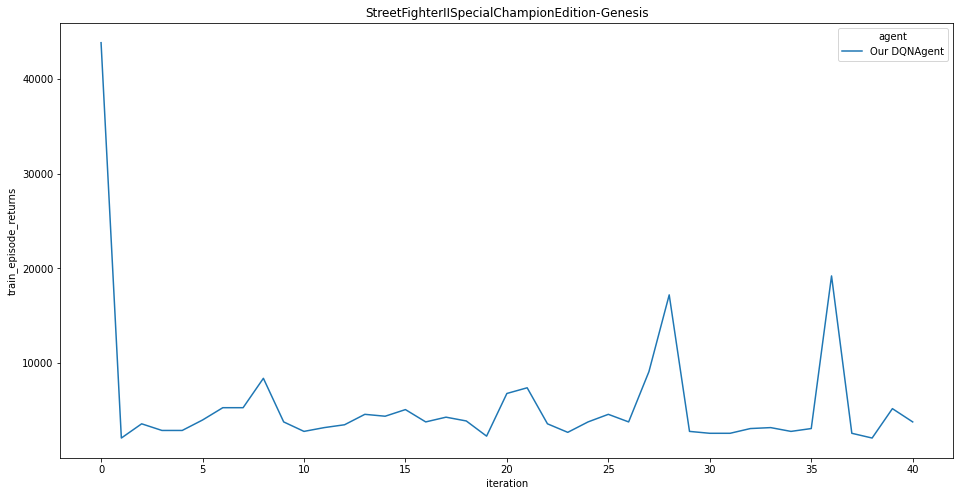

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns', hue='agent', data=experimental_data[GAME])
#sns.tsplot(data=experimental_data[GAME], time='iteration', unit='run_number', condition='agent', value='train_episode_returns', ax=ax)
plt.title(GAME)
plt.show()

KeyboardInterrupt: ignored

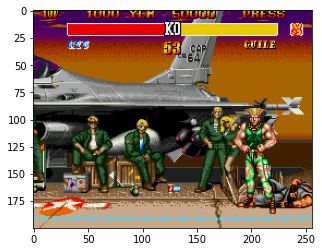

In [ ]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
import retro
%matplotlib inline
#env = Gym_retro.make(game='StreetFighterIISpecialChampionEdition-Genesis')
env = dqn_runner._environment
# Strip out the TimeLimit wrapper from Gym, which caps us at 200 steps.
#env = env.env
# Wrap the returned environment in a class which conforms to the API expected
# by Dopamine.
#env = gym_lib.GymPreprocessing(env)
observation = env.reset()
reward = 0
done = False
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
dqn_runner._agent.eval_mode = True
for t in range(100000):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = dqn_runner._agent.step(reward, observation)
    observation, reward, done, info = env.step(action)
    #observation, reward, done, info = env.step(env.action_space.sample())
    if done:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

In [ ]:
env.close()